<a href="https://colab.research.google.com/github/chaudhary-dotcom/PCA/blob/main/pca_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd

In [73]:
np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df1['Target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df2['Target'] = 0

df = pd.concat([df1, df2], ignore_index=True)
df = df.sample(40)

df.head()


,feature1,feature2,feature3,Target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [75]:
df.shape

(40, 4)

In [74]:
import plotly.express as px
# y_train_trf = y_train.astype(str)

fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3',
                    color=df['Target'].astype('str'))
fig.update_traces(marker=dict(size=12, line=dict(width=2,
                                                 color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [76]:
# Step-1: Apply Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])


In [77]:
# Step 2: Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0], df.iloc[:, 1], df.iloc[:, 2]])
print('Covariance Matrix: \n', covariance_matrix)

Covariance Matrix: 
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [65]:
# finding eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([0.83006218, 1.24416981, 1.08366274])

In [78]:
eigen_vectors

array([[-0.67597553,  0.72707359,  0.12008781],
       [ 0.62597306,  0.65251607, -0.42706031],
       [ 0.3888635 ,  0.21351059,  0.89621337]])

Populating the interactive namespace from numpy and matplotlib


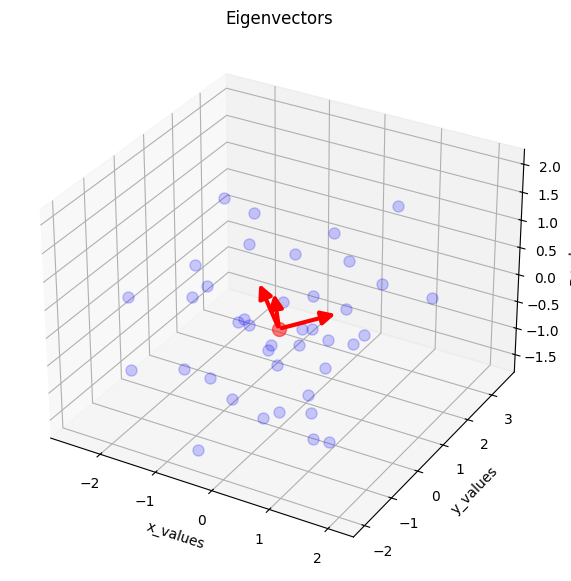

In [79]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)  # or max(zs), or average — depending on desired depth sorting


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
  a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]],  mutation_scale=20, lw=3, arrowstyle='-|>', color='r')
  ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')
plt.show()

In [80]:
df.shape

(40, 4)

In [82]:
pc = eigen_vectors[0:2]
pc

array([[-0.67597553,  0.72707359,  0.12008781],
       [ 0.62597306,  0.65251607, -0.42706031]])

In [83]:
# Applying Dot product
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['Target'].values
new_df.head()

,PC1,PC2,target
0,-0.845536,-0.687162,1
1,-0.524158,-1.009848,0
2,-0.104391,0.239628,1
3,-1.749533,0.717757,1
4,1.513877,-1.781986,1


In [85]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()